**INTRODUCTION**

Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

Over time, having too much glucose in your blood can cause health problems. Although diabetes has no cure, you can take steps to manage your diabetes and stay healthy.

**CONTEXT**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**CONTENT**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**VARIABLE DESCRIPTION**

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diabetes = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.shape

(768, 9)

The datasets contains 768 rows and 9 columns. 

In [4]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
diabetes.describe().T #helps us to understand how the data has been spread accross the table.

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


We observe that min value of some columns is 0, which cannot be possible medically. We will replace it with the median or mean value depending on the distribution. In addition to finding a value of 0, there is also a value that is too high (846) in the Insulin column which is suspected to be an outlier, so treatment is necessary.

**Data Cleaning**

In [8]:
#checking duplicated value
diabetes.duplicated().sum()

0

In [9]:
#checking for missing value
diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

There are null value in some columns, and we'll replace the value with median/mean value. Glucose and BloodPressure will be replaced with mean value, the rest will be replaced with median value.

**Handling Missing Value**

In [10]:
diabetes['Glucose'].fillna(diabetes['Glucose'].mean(), inplace = True)
diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].mean(), inplace = True)
diabetes['SkinThickness'].fillna(diabetes['SkinThickness'].median(), inplace = True)
diabetes['Insulin'].fillna(diabetes['Insulin'].median(), inplace = True)
diabetes['BMI'].fillna(diabetes['BMI'].mean(), inplace = True)

In [11]:
#recheck missing value
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Data Visualization**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


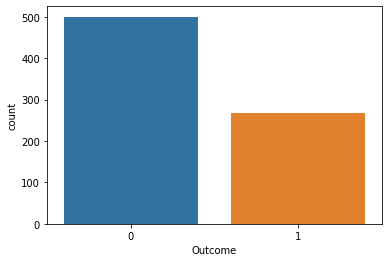

In [12]:
#countplot to see if the dataset is balance or not
sns.countplot('Outcome', data=diabetes)
plt.show()

The number of people who do not have diabetes is far more than people who have diabetes, which indicates the data is imbalanced.

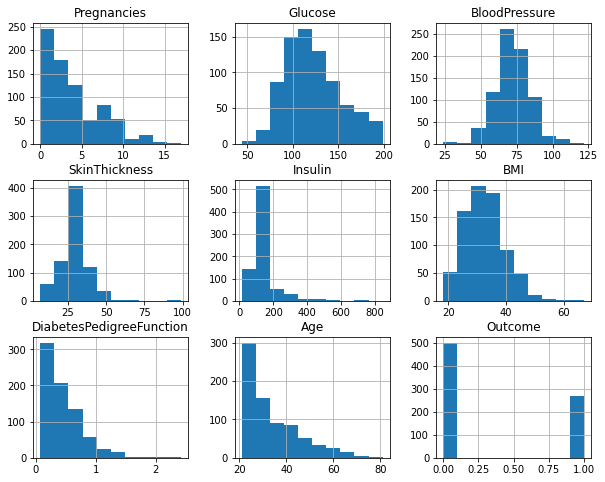

In [13]:
#histogram plot to see if the data is distributes normally or skewed
diabetes.hist(figsize = (10, 8))
plt.show()

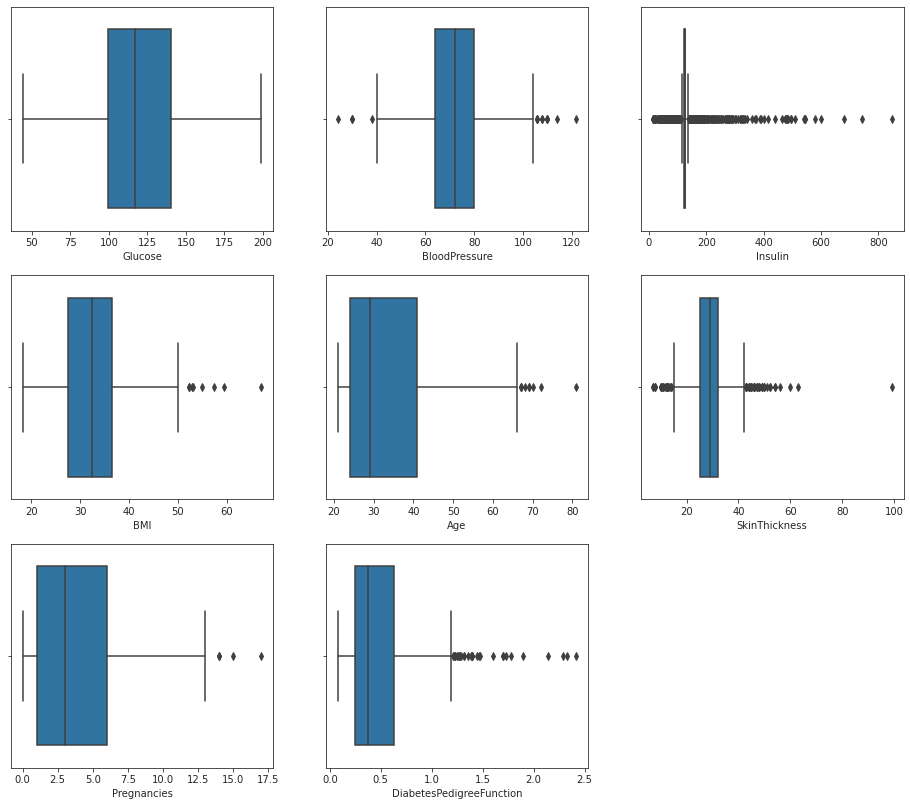

In [14]:
#boxplot to analyse the distribution and see the outliers 
plt.figure(figsize=(16,14))
sns.set_style(style='ticks')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=diabetes)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=diabetes)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=diabetes)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=diabetes)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=diabetes)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=diabetes)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=diabetes)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=diabetes)
plt.show()

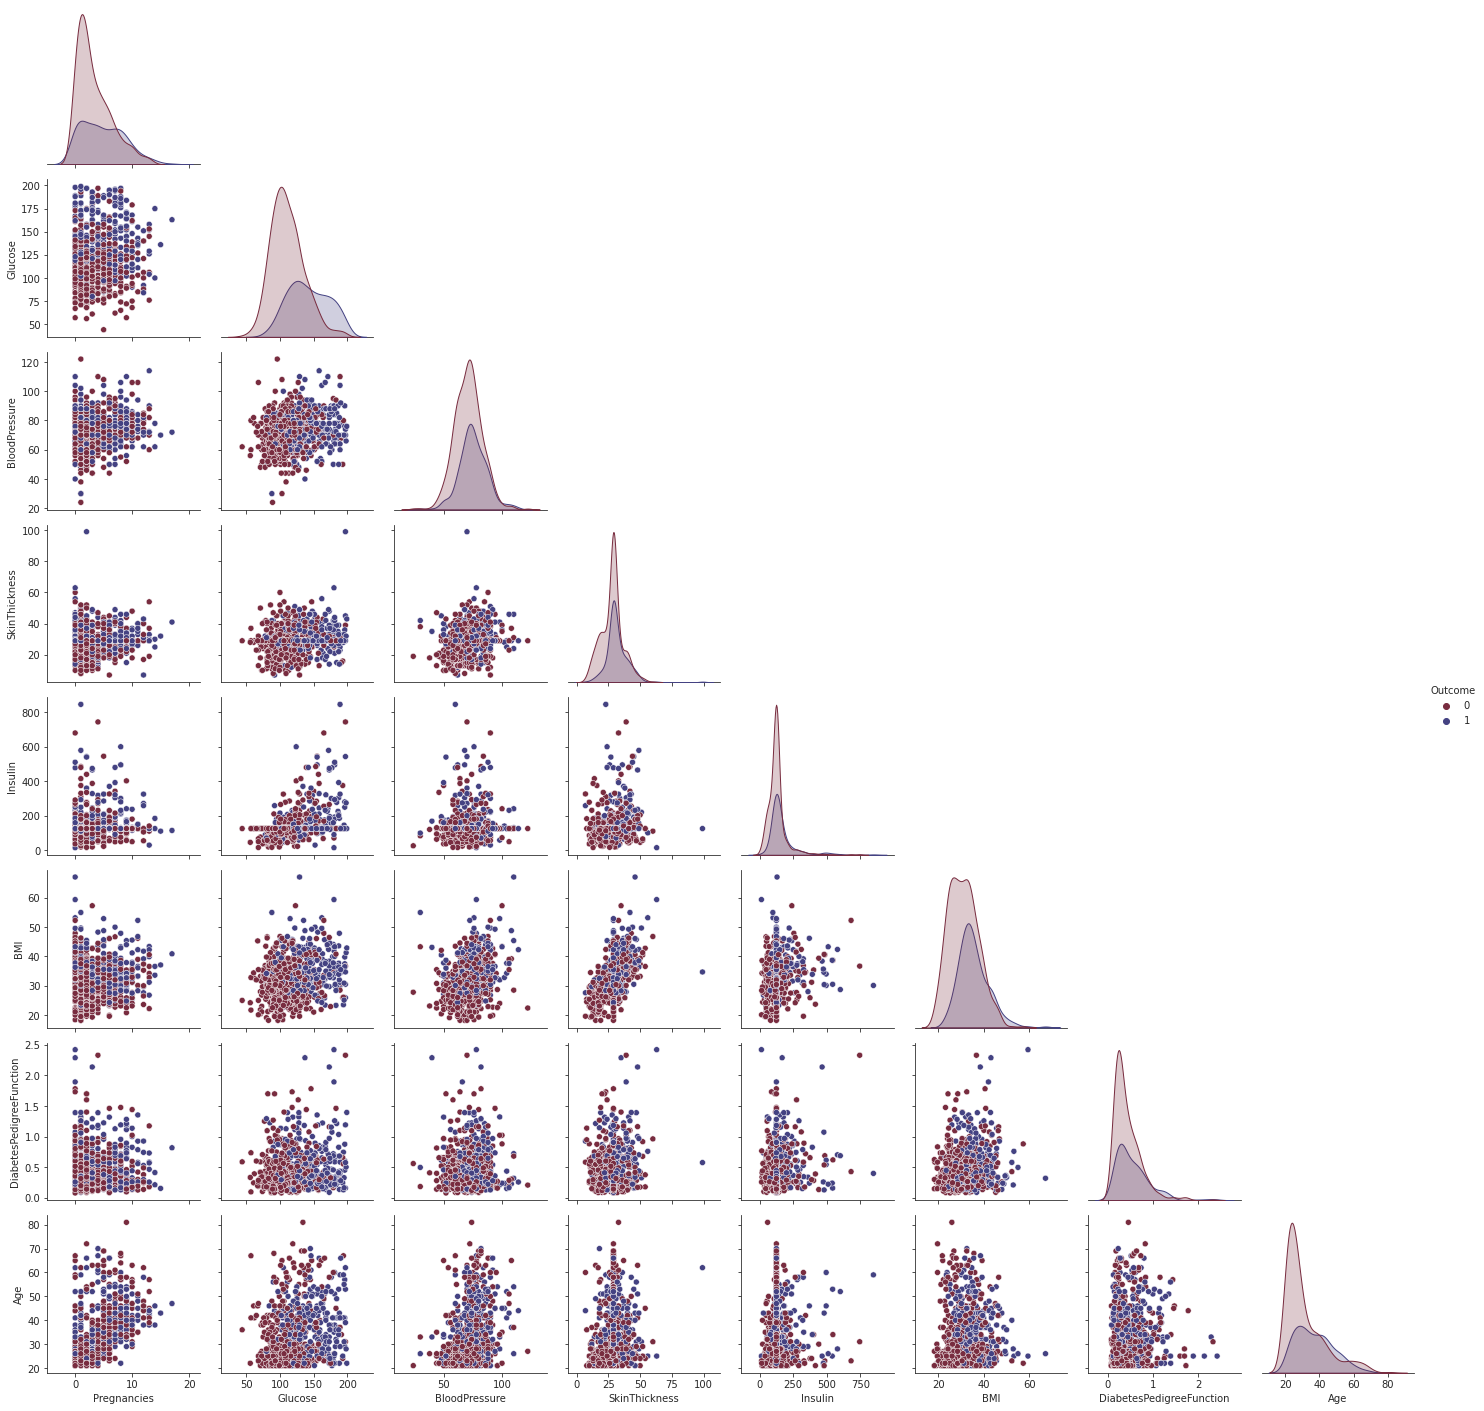

In [15]:
#pairplot to create a scatter plot between all the variables
pair = sns.PairGrid(diabetes, hue="Outcome", palette="icefire_r", diag_sharey=False, corner=True)
pair.map_lower(sns.scatterplot)
pair.map_diag(sns.kdeplot, fill=True)
pair.add_legend();
plt.show()

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our dataset. 

Pairplots can provide a lot of insight into the relationship between each column in the data set. For example, we can gain insight into the relationship between Pregnancies and Insulin, **the women that have a higher number of Pregnancies has lower Insulin**.

**Feature Selection**

Feature Selection is a process where we automatically or manually select those features which contribute most to the prediction variable. Having irrelevant features in the data can decrease the accuracy of the models and make the model learn based on irrelevant features.



**Correlation Matrix**

Variables within a dataset can be related for lots of reasons. It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

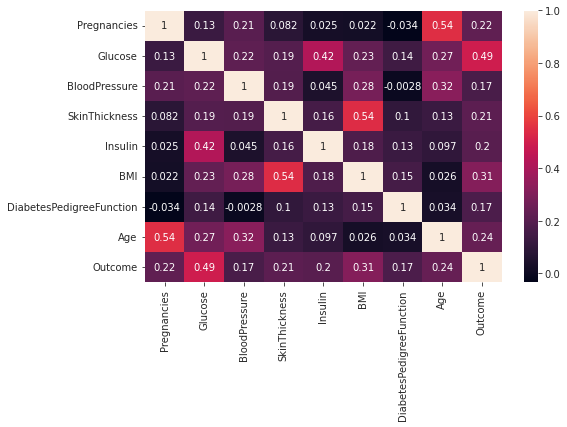

In [16]:
#heatmap
plt.figure(figsize=(8,5))
sns.heatmap(diabetes.corr(), annot = True)
plt.show()

From heatmap image we can observe the correlation value of all features to the target (Outcome). Glucose, BMI, and Age were the features that were most correlated with the target. while the features with very low correlation are Insulin, DiabetesPedigreeFunction, and BloodPressure. The features with low correlation will then be dropped.

In [17]:
diabetes_selected = diabetes.drop(['Insulin', 'DiabetesPedigreeFunction', 'BloodPressure'], axis='columns')

In [18]:
diabetes_selected.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,6,148.0,35.0,33.6,50,1
1,1,85.0,29.0,26.6,31,0
2,8,183.0,29.0,23.3,32,1
3,1,89.0,23.0,28.1,21,0
4,0,137.0,35.0,43.1,33,1


**Handling Outliers**

An outlier is a data point that is noticeably different from the rest. They represent errors in measurement, bad data collection, or simply show variables not considered when collecting the data.

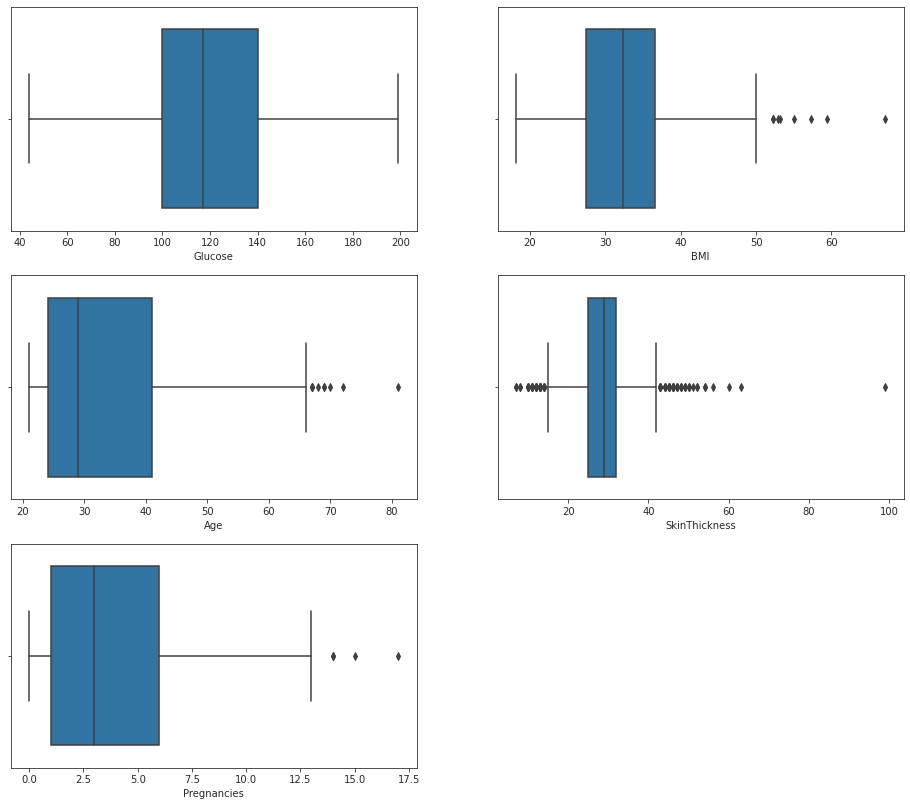

In [19]:
#boxplot to analyse the distribution and see the outliers 
plt.figure(figsize=(16,14))
sns.set_style(style='ticks')
plt.subplot(3,2,1)
sns.boxplot(x='Glucose',data=diabetes)
plt.subplot(3,2,2)
sns.boxplot(x='BMI',data=diabetes)
plt.subplot(3,2,3)
sns.boxplot(x='Age',data=diabetes)
plt.subplot(3,2,4)
sns.boxplot(x='SkinThickness',data=diabetes)
plt.subplot(3,2,5)
sns.boxplot(x='Pregnancies',data=diabetes)
plt.show()

**Quantile Transformation**

Quantile transforms are a technique for transforming numerical input or output variables to have a Gaussian or uniform probability distribution. The quantile transform provides an automatic way to transform a numeric input variable to have a different data distribution, which in turn, can be used as input to a predictive model.

In [20]:
from sklearn.preprocessing import QuantileTransformer
x=diabetes_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
diabetes_new=quantile.transform(X)
diabetes_new=pd.DataFrame(X)
diabetes_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
diabetes_new.head()

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  "X does not have valid feature names, but"


,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.496741,0.213168,0.558670,0.0
2,0.863755,0.956975,0.496741,0.077575,0.585398,1.0
3,0.232725,0.124511,0.209909,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


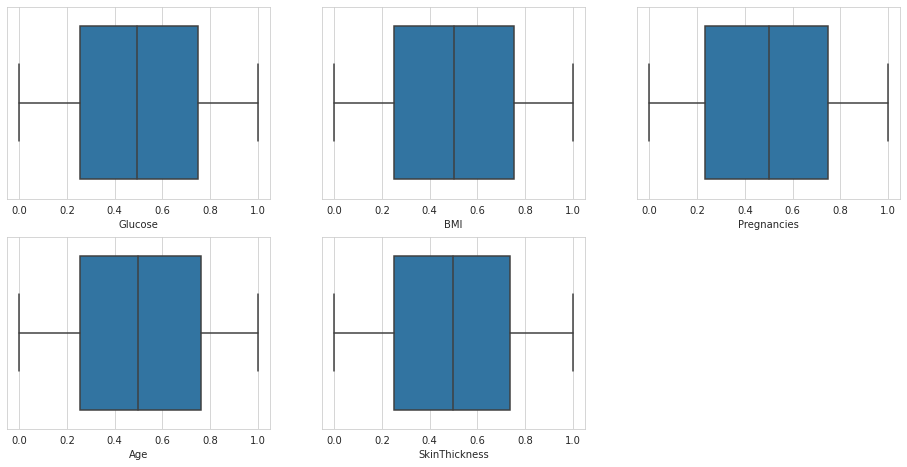

In [21]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=diabetes_new['Glucose'],data=diabetes_new)
plt.subplot(3,3,2)
sns.boxplot(x=diabetes_new['BMI'],data=diabetes_new)
plt.subplot(3,3,3)
sns.boxplot(x=diabetes_new['Pregnancies'],data=diabetes_new)
plt.subplot(3,3,4)
sns.boxplot(x=diabetes_new['Age'],data=diabetes_new)
plt.subplot(3,3,5)
sns.boxplot(x=diabetes_new['SkinThickness'],data=diabetes_new)
plt.show()

In [22]:
diabetes_selected.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,6,148.0,35.0,33.6,50,1
1,1,85.0,29.0,26.6,31,0
2,8,183.0,29.0,23.3,32,1
3,1,89.0,23.0,28.1,21,0
4,0,137.0,35.0,43.1,33,1


**Splitting Data**

In [23]:
from sklearn.model_selection import train_test_split

feature = diabetes_selected.drop(columns='Outcome')
target = diabetes_selected[['Outcome']]

feature_diabetes_train, feature_diabetes_test, target_diabetes_train, target_diabetes_test = train_test_split(feature,
                                                                                                              target,
                                                                                                              test_size = 0.20,
                                                                                                              random_state =42)

In [24]:
feature

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,6,148.0,35.0,33.6,50
1,1,85.0,29.0,26.6,31
2,8,183.0,29.0,23.3,32
3,1,89.0,23.0,28.1,21
4,0,137.0,35.0,43.1,33
...,...,...,...,...,...
763,10,101.0,48.0,32.9,63
764,2,122.0,27.0,36.8,27
765,5,121.0,23.0,26.2,30
766,1,126.0,29.0,30.1,47


**Models**

**1. Logistic Regression**

In [25]:

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(feature_diabetes_train, target_diabetes_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [26]:
y_pred = logreg.predict(feature_diabetes_test)
print(feature_diabetes_test)
print(y_pred)

     Pregnancies  Glucose  SkinThickness   BMI  Age
668            6     98.0           33.0  34.0   43
324            2    112.0           32.0  35.7   21
624            2    108.0           29.0  30.8   21
690            8    107.0           29.0  24.6   34
473            7    136.0           29.0  29.9   50
..           ...      ...            ...   ...  ...
355            9    165.0           29.0  30.4   49
534            1     77.0           30.0  33.3   24
344            8     95.0           29.0  36.8   57
296            2    146.0           38.0  28.0   29
462            8     74.0           40.0  35.3   39

[154 rows x 5 columns]
[0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0]


**Model Evaluation**

In this step, we'll evaluate how well our model performed predictive analytics by running a classification and a ROC curve.


Classification Report is a performance evaluation report that is used to evaluate the performance of machine learning models by the following 5 criteria: accuracy, recall, precision, F-score, support.

In [27]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('Accuracy: ',metrics.accuracy_score(target_diabetes_test, y_pred))
print('Recall: ',metrics.recall_score(target_diabetes_test, y_pred, zero_division=1))
print('Precision: ',metrics.precision_score(target_diabetes_test, y_pred, zero_division=1))
print('CL Report:',metrics.classification_report(target_diabetes_test, y_pred, zero_division=1))

Accuracy:  0.7597402597402597
Recall:  0.6545454545454545
Precision:  0.6666666666666666
CL Report:               precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



The model's performance in number is:

- Accuracy : 76%

- Recall : 65%

- Precision: 66%




**ROC Curve**

The Receiver Operating Characteristic (ROC) curve is used to display the sensitivity and specificity of the logistic regression model by calculating the true positive and false positive rates.

From the ROC curve, we can calculate the area under the curve (AUC). AUC Ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

In [28]:
#define the metrics
y_pred_proba = logreg.predict_proba(feature_diabetes_test) [::,1]

In [29]:
#calculate the true positive and false positive rates
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(target_diabetes_test, y_pred_proba)

In [30]:
#calculate the AUC to see the model's performance
auc = metrics.roc_auc_score(target_diabetes_test, y_pred_proba)

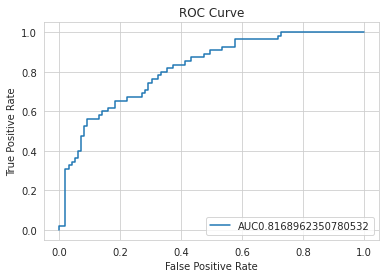

In [31]:
#plot the ROC curve
plt.plot(false_positive_rate, true_positive_rate, label = 'AUC'+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

The AUC score for Logistic Regression is 0.82, meaning that the model did a great job.

**2. KNeighborsClassifier** 

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(feature_diabetes_train, target_diabetes_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [33]:
y_pred_kkn = knn.predict(feature_diabetes_test)

In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import classification_report
print('Accuracy: ',metrics.accuracy_score(target_diabetes_test, y_pred_kkn))
print('Recall: ',metrics.recall_score(target_diabetes_test, y_pred_kkn, zero_division=1))
print('Precision: ',metrics.precision_score(target_diabetes_test, y_pred_kkn, zero_division=1))
print('CL Report:',metrics.classification_report(target_diabetes_test, y_pred_kkn, zero_division=1))

Accuracy:  0.7337662337662337
Recall:  0.6727272727272727
Precision:  0.6166666666666667
CL Report:               precision    recall  f1-score   support

           0       0.81      0.77      0.79        99
           1       0.62      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



The model's performance in number is:

Accuracy : 73%

Recall : 67%

Precision : 62%

**ROC Curve**

In [35]:
#define the metrics
y_pred_proba_1 = knn.predict_proba(feature_diabetes_test) [::,1]

In [36]:
#calculate the true positive and false positive rates
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(target_diabetes_test, y_pred_proba_1)

In [37]:
#calculate the AUC to see the model's performance
auc = metrics.roc_auc_score(target_diabetes_test, y_pred_proba_1)

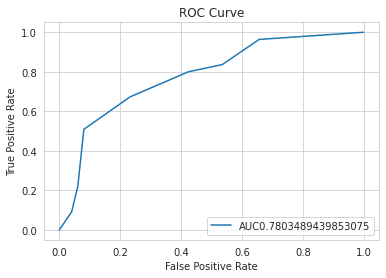

In [38]:
#plot the ROC curve
plt.plot(false_positive_rate, true_positive_rate, label = 'AUC'+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

The AUC score for KNeighborsClassifier 0.78 meaning that the model did a pretty good job.

**3. GradientBostingClassifier**

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(feature_diabetes_train, target_diabetes_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [40]:
y_pred_gbc=gbc.predict(feature_diabetes_test)

In [41]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import classification_report
print('Accuracy: ',metrics.accuracy_score(target_diabetes_test, y_pred_gbc))
print('Recall: ',metrics.recall_score(target_diabetes_test, y_pred_gbc, zero_division=1))
print('Precision: ',metrics.precision_score(target_diabetes_test, y_pred_gbc, zero_division=1))
print('CL Report:',metrics.classification_report(target_diabetes_test, y_pred_gbc, zero_division=1))

Accuracy:  0.7012987012987013
Recall:  0.6181818181818182
Precision:  0.576271186440678
CL Report:               precision    recall  f1-score   support

           0       0.78      0.75      0.76        99
           1       0.58      0.62      0.60        55

    accuracy                           0.70       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.70      0.70       154



The model's performance in number is:

Accuracy : 70%

Recall : 62%

Precision : 58%

**ROC Curve**

In [42]:
#define the metrics
y_pred_proba_2 = gbc.predict_proba(feature_diabetes_test) [::,1]

In [43]:
#calculate the true positive and false positive rates
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(target_diabetes_test, y_pred_proba_2)

In [44]:
#calculate the AUC to see the model's performance
auc = metrics.roc_auc_score(target_diabetes_test, y_pred_proba_2)

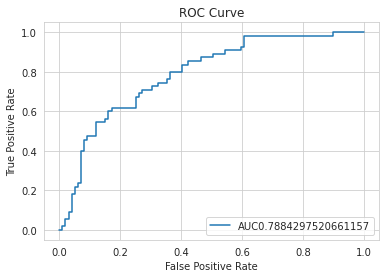

In [45]:
plt.plot(false_positive_rate, true_positive_rate, label = 'AUC'+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

The AUC score for GradientBostingClassifier is 0.79, meaning that the model did a pretty good job.

**Conclusion**

In this analysis, comparing the accuracies and the ROC curve from the models we determined that Logistic Regression was the best model to predicted diabetes, with aN accuracy of 76% and the AUC 0.82. We had the best result using 'Pregnancies', 'Glucose', 'BMI' and 'Age' as the features for this model. 

